In [159]:
!pip install fast_ml

In [160]:
import pandas as pd
from fast_ml.outlier_treatment import OutlierTreatment
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler

In [161]:
data = pd.read_csv('/kaggle/input/predict-baseball-players-position/baseball_players.csv')

In [162]:
data.dtypes

Name               object
Team               object
Position           object
Height(inches)      int64
Weight(pounds)    float64
Age               float64
dtype: object

In [163]:
data.shape

(1034, 6)

In [164]:
data.isnull().sum()

Name              0
Team              0
Position          0
Height(inches)    0
Weight(pounds)    1
Age               0
dtype: int64

In [165]:
mea = data['Weight(pounds)'].mean()
data['Weight(pounds)'] = data['Weight(pounds)'].fillna(mea)

In [166]:
data.isnull().sum()

Name              0
Team              0
Position          0
Height(inches)    0
Weight(pounds)    0
Age               0
dtype: int64

Need to predict the position of the player

In [167]:
data.head()

,Name,Team,Position,Height(inches),Weight(pounds),Age
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71


In [168]:
data['Weight(pounds)'] = data['Weight(pounds)'].astype(int)
data['Age'] = data['Age'].astype(int)

In [169]:
data

,Name,Team,Position,Height(inches),Weight(pounds),Age
0,Adam_Donachie,BAL,Catcher,74,180,22
1,Paul_Bako,BAL,Catcher,74,215,34
2,Ramon_Hernandez,BAL,Catcher,72,210,30
3,Kevin_Millar,BAL,First_Baseman,72,210,35
4,Chris_Gomez,BAL,First_Baseman,73,188,35
...,...,...,...,...,...,...
1029,Brad_Thompson,STL,Relief_Pitcher,73,190,25
1030,Tyler_Johnson,STL,Relief_Pitcher,74,180,25
1031,Chris_Narveson,STL,Relief_Pitcher,75,205,25
1032,Randy_Keisler,STL,Relief_Pitcher,75,190,31


Treating outliers

<AxesSubplot:>

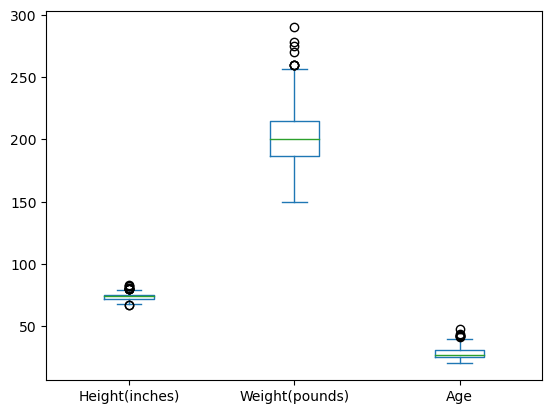

In [170]:
data.plot(kind='box')

In [171]:
ot = OutlierTreatment()

In [172]:
ot.fit(data,['Height(inches)','Weight(pounds)','Age'])
data=ot.transform(data)

<AxesSubplot:>

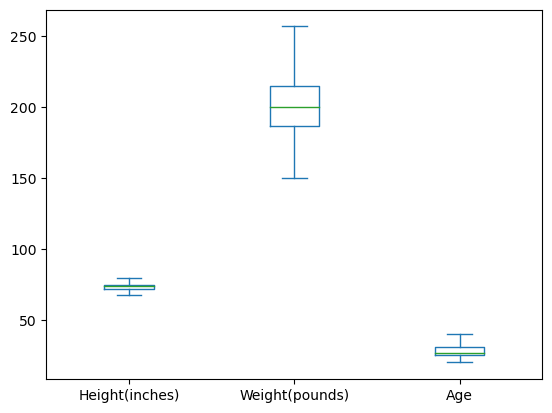

In [173]:
data.plot(kind='box')

All the outliers are removed 

Now check the type of the position and make it convinient to use 

<AxesSubplot:xlabel='count', ylabel='Position'>

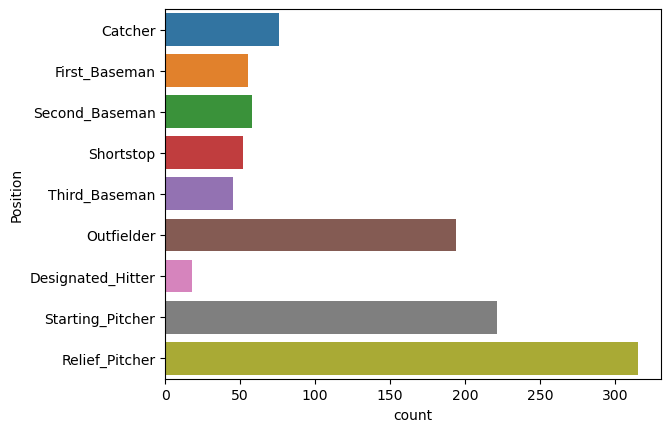

In [174]:
sns.countplot(data = data,y = 'Position')

There are many Relief_Pitchers in the DATA

Correlation Matrix

<AxesSubplot:>

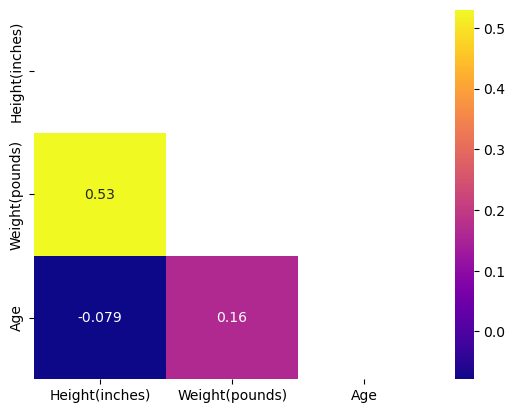

In [175]:
corr_mat = np.triu(data.corr())
sns.heatmap(data.corr(),cmap='plasma',annot=True,mask = corr_mat)

No evidence of collinearity exists between independent variables.

Feature or Column selection

In [176]:
x = data.iloc[:,3:]
x

,Height(inches),Weight(pounds),Age
0,74.0,180.0,22.0
1,74.0,215.0,34.0
2,72.0,210.0,30.0
3,72.0,210.0,35.0
4,73.0,188.0,35.0
...,...,...,...
1029,73.0,190.0,25.0
1030,74.0,180.0,25.0
1031,75.0,205.0,25.0
1032,75.0,190.0,31.0


In [177]:
y = data.iloc[:,2]
y

0              Catcher
1              Catcher
2              Catcher
3        First_Baseman
4        First_Baseman
             ...      
1029    Relief_Pitcher
1030    Relief_Pitcher
1031    Relief_Pitcher
1032    Relief_Pitcher
1033    Relief_Pitcher
Name: Position, Length: 1034, dtype: object

y is an object dtype so need to change it 

In [178]:
y1 = pd.get_dummies(y)
y1

,Catcher,Designated_Hitter,First_Baseman,Outfielder,Relief_Pitcher,Second_Baseman,Shortstop,Starting_Pitcher,Third_Baseman
0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1029,0,0,0,0,1,0,0,0,0
1030,0,0,0,0,1,0,0,0,0
1031,0,0,0,0,1,0,0,0,0
1032,0,0,0,0,1,0,0,0,0


In [179]:
x_train,x_test,y_train,y_test = train_test_split(x,y1,test_size=0.2,random_state=0)

In [180]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(827, 3)
(207, 3)
(827, 9)
(207, 9)


**Training the model**

In [181]:
lr = LinearRegression()

In [182]:
lr.fit(x_train,y_train)

LinearRegression()

In [183]:
pred = lr.predict(x_test)
pred

array([[ 0.07191971,  0.01903172,  0.04909842, ...,  0.06372909,
         0.18554273,  0.04812694],
       [ 0.10898082,  0.01145155,  0.04986993, ...,  0.10568601,
         0.06216238,  0.0768685 ],
       [ 0.07378031,  0.0176557 ,  0.05475253, ...,  0.05798541,
         0.18568579,  0.05265476],
       ...,
       [ 0.00216405, -0.00717961, -0.00185792, ...,  0.09037898,
         0.27083844,  0.03519375],
       [ 0.12731712,  0.03264848,  0.07097394, ...,  0.07631526,
         0.07741851,  0.06275036],
       [ 0.09978857,  0.05363064,  0.11521419, ..., -0.03472052,
         0.26270691,  0.03368814]])

**Evaluating the model**

R2_score

In [184]:
r2 = r2_score(y_test,pred)
print(r2)

0.011791945088446573


Mean-Squared_error

In [186]:
mse = mean_squared_error(y_test,pred)
mse

0.08758702269514355

Root mean squared error

In [187]:
rmse = np.sqrt(mse)
rmse

0.2959510478020707